<a href="https://colab.research.google.com/github/HLaw18/4105/blob/main/HW5_4105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
torch.set_printoptions(edgeitems=2, linewidth=75)
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, TensorDataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#1
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

def model(t_u, w1, w2, b):
    return w2 * t_u**2 + w1 * t_u + b
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w1, w2, b)
t_p

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()
loss = loss_fn(t_p, t_c)
loss
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
delta = 0.1

lossW = \
    (loss_fn(model(t_u, w2 + delta, w1 + delta, b), t_c) -
     loss_fn(model(t_u, w2 - delta, w1 - delta, b), t_c)) / (2.0 * delta)

learningRate = .01

w = (w2+w1) - learningRate * lossW
w

loss_rate_of_change_b = \
    (loss_fn(model(t_u, w2, w1, b + delta), t_c) -
     loss_fn(model(t_u, w2, w1, b - delta), t_c)) / (2.0 * delta)

b = b - learningRate * loss_rate_of_change_b
b

def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs
def dmodel_dw1(t_u, w2, w1, b):
    return t_u
def dmodel_db(t_u, w2, w1, b):
    return 1.0
def dmodel_dw2(t_u, w1, w2, b):
    return t_u**2

def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1 , w2, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])

def training_loop(nEpochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>

    return params

def training_loop(nEpochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, nEpochs + 1):
        w1, w2, b = params
        t_p = model(t_u, w1, w2, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, b)
        params = params - learning_rate * grad
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

t_un = 0.1 * t_u

In [ ]:
params = training_loop(
nEpochs = 5000,
learning_rate = 0.0002,
params = torch.tensor([1.0, 1.0, 0.0]), t_u = t_un, t_c = t_c)

Epoch 500, Loss 8.644965
Epoch 1000, Loss 6.124641
Epoch 1500, Loss 4.845726
Epoch 2000, Loss 4.194871
Epoch 2500, Loss 3.861782
Epoch 3000, Loss 3.689472
Epoch 3500, Loss 3.598522
Epoch 4000, Loss 3.548753
Epoch 4500, Loss 3.519840
Epoch 5000, Loss 3.501493


In [ ]:
params = training_loop(
nEpochs = 5000,
learning_rate = 0.0005,
params = torch.tensor([1.0, 1.0, 0.0]), t_u = t_un, t_c = t_c)

Epoch 500, Loss 5.380125
Epoch 1000, Loss 3.861909
Epoch 1500, Loss 3.570068
Epoch 2000, Loss 3.501501
Epoch 2500, Loss 3.473751
Epoch 3000, Loss 3.453631
Epoch 3500, Loss 3.435097
Epoch 4000, Loss 3.417055
Epoch 4500, Loss 3.399295
Epoch 5000, Loss 3.381782


In [ ]:
params = training_loop(
nEpochs = 5000,
learning_rate = 0.0008,
params = torch.tensor([1.0, 1.0, 0.0]), t_u = t_un, t_c = t_c)

Epoch 500, Loss 4.195780
Epoch 1000, Loss 3.548735
Epoch 1500, Loss 3.478307
Epoch 2000, Loss 3.446148
Epoch 2500, Loss 3.417075
Epoch 3000, Loss 3.388779
Epoch 3500, Loss 3.361095
Epoch 4000, Loss 3.334007
Epoch 4500, Loss 3.307492
Epoch 5000, Loss 3.281545


In [ ]:
params = training_loop(
nEpochs = 5000,
learning_rate = 0.0001,
params = torch.tensor([1.0, 1.0, 0.0]), t_u = t_un, t_c = t_c)

Epoch 500, Loss 10.708597
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123476
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


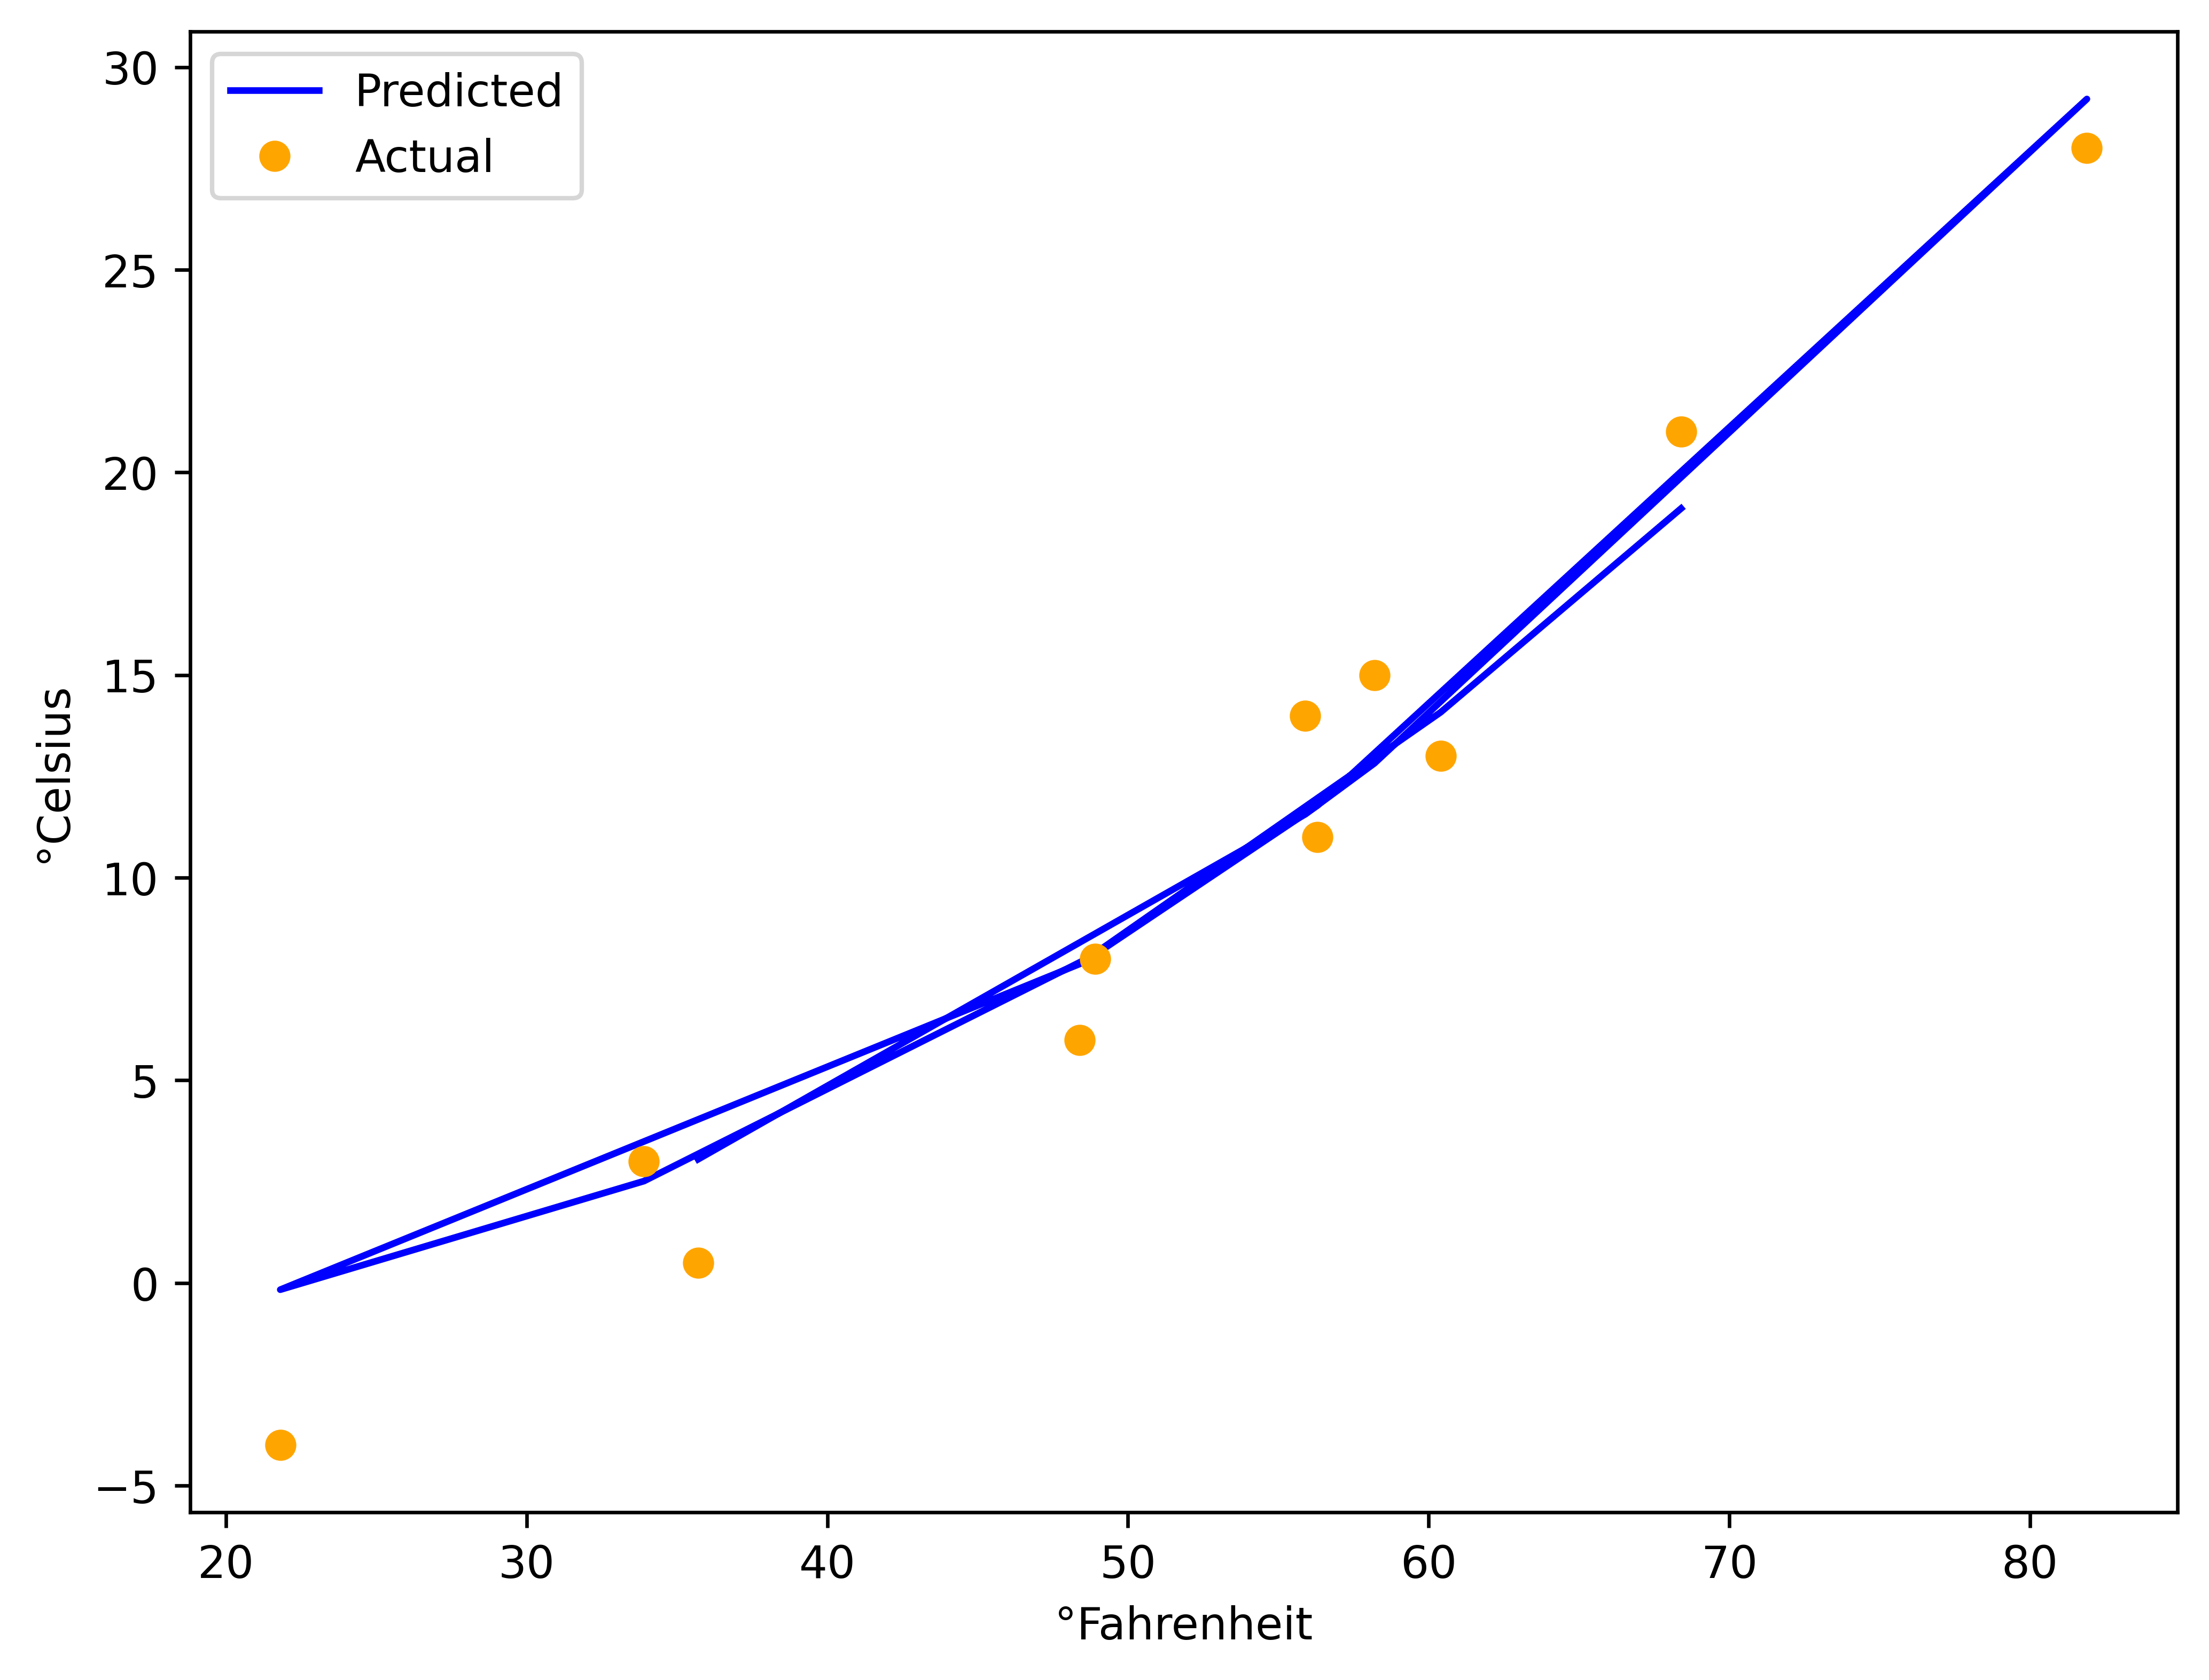

In [ ]:
%matplotlib inline
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel("°Fahrenheit")
plt.ylabel("°Celsius")
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='blue', label='Predicted')
plt.plot(t_u.numpy(), t_c.numpy(), 'o', color='orange', label='Actual')
plt.legend()
plt.show()

In [ ]:
#2 multi
file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/Housing.csv'
data = pd.DataFrame(pd.read_csv(file_path))

X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

def train(model, optimizer, criterion, num_epochs, X_train, y_train, X_val, y_val, lr_schedule):
    best_loss = float('inf')
    best_val_accuracy = float('inf')

    for epoch in range(1, num_epochs + 1):
        model.train()
        optimizer.param_groups[0]['lr'] = lr_schedule(epoch)

        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            model.eval()
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            print(f'Epoch {epoch}/{num_epochs}, Learning Rate: {optimizer.param_groups[0]["lr"]:.4f}, '
                  f'Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

            if val_loss < best_loss:
                best_loss = val_loss.item()
                best_val_accuracy = loss.item()

    return best_loss, best_val_accuracy

def lr_schedule(epoch):
    lr = 0.1
    return max(lr, 0.0001)

best_overall_loss_sgd = float('inf')
best_overall_val_accuracy_sgd = float('inf')
best_learning_rate_sgd = None

best_overall_loss_adam = float('inf')
best_overall_val_accuracy_adam = float('inf')
best_learning_rate_adam = None

for lr_exp in range(4):
    model_sgd = LinearRegressionModel(input_size=5)
    model_adam = LinearRegressionModel(input_size=5)

    optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.1)
    optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.1)

    criterion = nn.MSELoss()

    print(f'\nLearning Rate Exploration {lr_exp + 1} - SGD Optimizer')
    best_loss_sgd, best_val_accuracy_sgd = train(model_sgd, optimizer_sgd, criterion, num_epochs=5000,
                                                 X_train=X_train_tensor, y_train=y_train_tensor,
                                                 X_val=X_val_tensor, y_val=y_val_tensor,
                                                 lr_schedule=lr_schedule)

    if best_loss_sgd < best_overall_loss_sgd:
        best_overall_loss_sgd = best_loss_sgd
        best_overall_val_accuracy_sgd = best_val_accuracy_sgd
        best_learning_rate_sgd = optimizer_sgd.param_groups[0]["lr"]

    print(f'\nLearning Rate Exploration {lr_exp + 1} - Adam Optimizer')
    best_loss_adam, best_val_accuracy_adam = train(model_adam, optimizer_adam, criterion, num_epochs=5000,
                                                   X_train=X_train_tensor, y_train=y_train_tensor,
                                                   X_val=X_val_tensor, y_val=y_val_tensor,
                                                   lr_schedule=lr_schedule)

    if best_loss_adam < best_overall_loss_adam:
        best_overall_loss_adam = best_loss_adam
        best_overall_val_accuracy_adam = best_val_accuracy_adam
        best_learning_rate_adam = optimizer_adam.param_groups[0]["lr"]

print(f'\nSGD Optimizer - Best Learning Rate: {best_learning_rate_sgd:.4f}, '
      f'Best Loss: {best_overall_loss_sgd:.4f}, Best Validation Accuracy: {best_overall_val_accuracy_sgd:.4f}')

print(f'\nAdam Optimizer - Best Learning Rate: {best_learning_rate_adam:.4f}, '
      f'Best Loss: {best_overall_loss_adam:.4f}, Best Validation Accuracy: {best_overall_val_accuracy_adam:.4f}')


Learning Rate Exploration 1 - SGD Optimizer
Epoch 500/5000, Learning Rate: 0.1000, Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 1000/5000, Learning Rate: 0.1000, Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 1500/5000, Learning Rate: 0.1000, Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 2000/5000, Learning Rate: 0.1000, Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 2500/5000, Learning Rate: 0.1000, Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 3000/5000, Learning Rate: 0.1000, Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 3500/5000, Learning Rate: 0.1000, Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 4000/5000, Learning Rate: 0.1000, Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 4500/5000, Learning Rate: 0.1000, Loss: 1350008045568.0000, Validation Loss: 2292721647616.0000
Epoch 5000/5000, Learning Rate: 0.1000

In [ ]:
#2 single
file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/Housing.csv'
data = pd.DataFrame(pd.read_csv(file_path))

X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

def train(model, optimizer, criterion, num_epochs, X_train, y_train, X_val, y_val):
    best_loss = float('inf')
    best_val_accuracy = float('inf')

    for epoch in range(1, num_epochs + 1):
        model.train()

        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            model.eval()
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            print(f'Epoch {epoch}/{num_epochs}, '
                  f'Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

            if val_loss < best_loss:
                best_loss = val_loss.item()
                best_val_accuracy = loss.item()

    return best_loss, best_val_accuracy

learning_rate = 0.0001

model_sgd = LinearRegressionModel(input_size=X_train.shape[1])
model_adam = LinearRegressionModel(input_size=X_train.shape[1])

optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=learning_rate)

optimizer_adam = optim.Adam(model_adam.parameters(), lr=learning_rate)

criterion = nn.MSELoss()

print(f'\nLearning Rate 0.0001 - SGD Optimizer')
best_loss_sgd, best_val_accuracy_sgd = train(model_sgd, optimizer_sgd, criterion, num_epochs=5000,
                                             X_train=X_train_tensor, y_train=y_train_tensor,
                                             X_val=X_val_tensor, y_val=y_val_tensor)

print(f'\nLearning Rate 0.0001 - Adam Optimizer')
best_loss_adam, best_val_accuracy_adam = train(model_adam, optimizer_adam, criterion, num_epochs=5000,
                                               X_train=X_train_tensor, y_train=y_train_tensor,
                                               X_val=X_val_tensor, y_val=y_val_tensor)



Learning Rate Exploration - SGD Optimizer
Epoch 500/5000, Loss: 20798509154304.0000, Validation Loss: 25025291747328.0000
Epoch 1000/5000, Loss: 17197347897344.0000, Validation Loss: 20892188934144.0000
Epoch 1500/5000, Loss: 14275511844864.0000, Validation Loss: 17537843593216.0000
Epoch 2000/5000, Loss: 11901297754112.0000, Validation Loss: 14809656459264.0000
Epoch 2500/5000, Loss: 9969597415424.0000, Validation Loss: 12586381737984.0000
Epoch 3000/5000, Loss: 8396162465792.0000, Validation Loss: 10771267321856.0000
Epoch 3500/5000, Loss: 7113319907328.0000, Validation Loss: 9286883213312.0000
Epoch 4000/5000, Loss: 6066528059392.0000, Validation Loss: 8071045185536.0000
Epoch 4500/5000, Loss: 5211738865664.0000, Validation Loss: 7073687928832.0000
Epoch 5000/5000, Loss: 4513281867776.0000, Validation Loss: 6254368915456.0000

Learning Rate Exploration - Adam Optimizer
Epoch 500/5000, Loss: 25234788843520.0000, Validation Loss: 30129992499200.0000
Epoch 1000/5000, Loss: 25234788843

In [ ]:
#3 single
file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/Housing.csv'
data = pd.DataFrame(pd.read_csv(file_path))

X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
          'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values

data = pd.get_dummies(data, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], drop_first=True)

X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes', 'basement_yes',
          'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes']].values
y = data['price'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

def train(model, optimizer, criterion, num_epochs, X_train, y_train, X_val, y_val):
    best_loss = float('inf')
    best_val_accuracy = float('inf')

    for epoch in range(1, num_epochs + 1):
        model.train()

        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            model.eval()
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            print(f'Epoch {epoch}/{num_epochs}, '
                  f'Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

            if val_loss < best_loss:
                best_loss = val_loss.item()
                best_val_accuracy = loss.item()

    return best_loss, best_val_accuracy

learning_rate = 0.0001

model_sgd = LinearRegressionModel(input_size=X_train.shape[1])
model_adam = LinearRegressionModel(input_size=X_train.shape[1])

optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=learning_rate)

optimizer_adam = optim.Adam(model_adam.parameters(), lr=learning_rate)

criterion = nn.MSELoss()

print(f'\nLearning Rate 0.0001 - SGD Optimizer')
best_loss_sgd, best_val_accuracy_sgd = train(model_sgd, optimizer_sgd, criterion, num_epochs=5000,
                                             X_train=X_train_tensor, y_train=y_train_tensor,
                                             X_val=X_val_tensor, y_val=y_val_tensor)

print(f'\nLearning Rate 0.0001 - Adam Optimizer')
best_loss_adam, best_val_accuracy_adam = train(model_adam, optimizer_adam, criterion, num_epochs=5000,
                                               X_train=X_train_tensor, y_train=y_train_tensor,
                                               X_val=X_val_tensor, y_val=y_val_tensor)




Learning Rate 0.0001 - SGD Optimizer
Epoch 500/5000, Loss: 20567379935232.0000, Validation Loss: 24715458510848.0000
Epoch 1000/5000, Loss: 16847105687552.0000, Validation Loss: 20412058566656.0000
Epoch 1500/5000, Loss: 13869535723520.0000, Validation Loss: 16969180905472.0000
Epoch 2000/5000, Loss: 11474181292032.0000, Validation Loss: 14199481696256.0000
Epoch 2500/5000, Loss: 9539317399552.0000, Validation Loss: 11960990040064.0000
Epoch 3000/5000, Loss: 7971384852480.0000, Validation Loss: 10144821805056.0000
Epoch 3500/5000, Loss: 6697527541760.0000, Validation Loss: 8666432405504.0000
Epoch 4000/5000, Loss: 5660509995008.0000, Validation Loss: 7459654598656.0000
Epoch 4500/5000, Loss: 4814930444288.0000, Validation Loss: 6472202715136.0000
Epoch 5000/5000, Loss: 4124586016768.0000, Validation Loss: 5662540038144.0000

Learning Rate 0.0001 - Adam Optimizer
Epoch 500/5000, Loss: 25234797232128.0000, Validation Loss: 30129992499200.0000
Epoch 1000/5000, Loss: 25234788843520.0000, 

In [ ]:
#3 multi
file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/Housing.csv'
data = pd.DataFrame(pd.read_csv(file_path))

X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
          'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values

data = pd.get_dummies(data, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], drop_first=True)

X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes', 'basement_yes',
          'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes']].values
y = data['price'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

def train(model, optimizer, criterion, num_epochs, X_train, y_train, X_val, y_val, lr_schedule):
    best_loss = float('inf')
    best_val_accuracy = float('inf')

    for epoch in range(1, num_epochs + 1):
        model.train()
        optimizer.param_groups[0]['lr'] = lr_schedule(epoch)

        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            model.eval()
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            print(f'Epoch {epoch}/{num_epochs}, Learning Rate: {optimizer.param_groups[0]["lr"]:.4f}, '
                  f'Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

            if val_loss < best_loss:
                best_loss = val_loss.item()
                best_val_accuracy = loss.item()

    return best_loss, best_val_accuracy

def lr_schedule(epoch):
    lr = 0.1 / (10 ** (epoch // 1000))
    return max(lr, 0.0001)

best_overall_loss_sgd = float('inf')
best_overall_val_accuracy_sgd = float('inf')
best_learning_rate_sgd = None

best_overall_loss_adam = float('inf')
best_overall_val_accuracy_adam = float('inf')
best_learning_rate_adam = None

for lr_exp in range(4):
    model_sgd = LinearRegressionModel(input_size=X_train.shape[1])
    model_adam = LinearRegressionModel(input_size=X_train.shape[1])

    optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.1)

    optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.1)

    criterion = nn.MSELoss()

    print(f'\nLearning Rate Exploration {lr_exp + 1} - SGD Optimizer')
    best_loss_sgd, best_val_accuracy_sgd = train(model_sgd, optimizer_sgd, criterion, num_epochs=5000,
                                                 X_train=X_train_tensor, y_train=y_train_tensor,
                                                 X_val=X_val_tensor, y_val=y_val_tensor,
                                                 lr_schedule=lr_schedule)

    if best_loss_sgd < best_overall_loss_sgd:
        best_overall_loss_sgd = best_loss_sgd
        best_overall_val_accuracy_sgd = best_val_accuracy_sgd
        best_learning_rate_sgd = optimizer_sgd.param_groups[0]["lr"]

    print(f'\nLearning Rate Exploration {lr_exp + 1} - Adam Optimizer')
    best_loss_adam, best_val_accuracy_adam = train(model_adam, optimizer_adam, criterion, num_epochs=5000,
                                                   X_train=X_train_tensor, y_train=y_train_tensor,
                                                   X_val=X_val_tensor, y_val=y_val_tensor,
                                                   lr_schedule=lr_schedule)

    if best_loss_adam < best_overall_loss_adam:
        best_overall_loss_adam = best_loss_adam
        best_overall_val_accuracy_adam = best_val_accuracy_adam
        best_learning_rate_adam = optimizer_adam.param_groups[0]["lr"]

print(f'\nSGD Optimizer - Best Learning Rate: {best_learning_rate_sgd:.4f}, '
      f'Best Loss: {best_overall_loss_sgd:.4f}, Best Validation Accuracy: {best_overall_val_accuracy_sgd:.4f}')

print(f'\nAdam Optimizer - Best Learning Rate: {best_learning_rate_adam:.4f}, '
      f'Best Loss: {best_overall_loss_adam:.4f}, Best Validation Accuracy: {best_overall_val_accuracy_adam:.4f}')



Learning Rate Exploration 1 - SGD Optimizer
Epoch 500/5000, Learning Rate: 0.1000, Loss: 992480985088.0000, Validation Loss: 1800794144768.0000
Epoch 1000/5000, Learning Rate: 0.0100, Loss: 992480985088.0000, Validation Loss: 1800794144768.0000
Epoch 1500/5000, Learning Rate: 0.0100, Loss: 992480985088.0000, Validation Loss: 1800794144768.0000
Epoch 2000/5000, Learning Rate: 0.0010, Loss: 992480985088.0000, Validation Loss: 1800794144768.0000
Epoch 2500/5000, Learning Rate: 0.0010, Loss: 992480985088.0000, Validation Loss: 1800794144768.0000
Epoch 3000/5000, Learning Rate: 0.0001, Loss: 992480985088.0000, Validation Loss: 1800794144768.0000
Epoch 3500/5000, Learning Rate: 0.0001, Loss: 992480985088.0000, Validation Loss: 1800794144768.0000
Epoch 4000/5000, Learning Rate: 0.0001, Loss: 992480985088.0000, Validation Loss: 1800794144768.0000
Epoch 4500/5000, Learning Rate: 0.0001, Loss: 992480985088.0000, Validation Loss: 1800794144768.0000
Epoch 5000/5000, Learning Rate: 0.0001, Loss: 9